# Capstone Project - Fruit classification

Link to Original dataset: https://www.kaggle.com/datasets/kshitij192/cars-image-dataset

8 groups of fruits were choosen from the original dataset to create the current dataset.

In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
dirname = os.path.dirname('Data')

In [6]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 48CE-D36B

 Directory of C:\Users\eddye\Documents\ML-ZOOMCAMP\CODE\projects\capstone_one

18/12/2022  11:17    <DIR>          .
17/12/2022  14:53    <DIR>          ..
17/12/2022  15:41    <DIR>          .ipynb_checkpoints
18/12/2022  09:39    <DIR>          Dataset
17/12/2022  15:42                 0 README.md
18/12/2022  11:17            63,291 train.ipynb
               2 File(s)         63,291 bytes
               4 Dir(s)  624,881,602,560 bytes free


In [7]:
os.getcwd()

'C:\\Users\\eddye\\Documents\\ML-ZOOMCAMP\\CODE\\projects\\capstone_one'

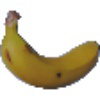

In [8]:
path = 'Dataset/train/Banana'
name = 'Banana_70.jpg'
fullname = f'{path}/{name}'
fullname

load_img(fullname)

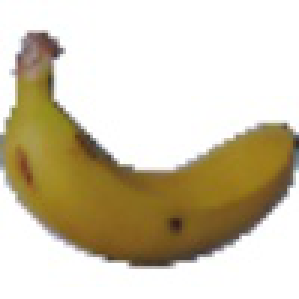

In [9]:
img = load_img(fullname, target_size=(299, 299))
img

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

In [11]:
##PIL python image library
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x1E0611ECFA0>


In [12]:
np.array(img)

array([[[251, 255, 255],
        [251, 255, 255],
        [251, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 255, 255],
        [251, 255, 255],
        [251, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 255, 255],
        [251, 255, 255],
        [251, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Transfer Learning

In [13]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [15]:
train_ds = train_gen.flow_from_directory(
    'Dataset/train',
    target_size=(150, 150),
    batch_size=32
)

Found 4214 images belonging to 10 classes.


In [16]:
### checking the class indices
train_ds.class_indices

{'Banana': 0,
 'Corn': 1,
 'Mango': 2,
 'Orange': 3,
 'Pepper Green': 4,
 'Pepper Red': 5,
 'Pineapple': 6,
 'Strawberry': 7,
 'Tomato': 8,
 'Watermelon': 9}

In [17]:
X, y = next(train_ds)

In [18]:
X

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [19]:
y[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [20]:
## validation set
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'Dataset/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 650 images belonging to 10 classes.


In [21]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

###lAST LINE MEANS DON'T CHANGE Convulutinoal layer

In [22]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)
##change 3 dimensional array to one dimensional array

outputs = keras.layers.Dense(10)(vectors)

##There are 10 classes.

model = keras.Model(inputs, outputs)

In [23]:
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [24]:
preds.shape

(32, 10)

In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
## It will show the accuracy

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
## 10 epochs means go over the data 10 times.

Epoch 1/10
132/132 [==============================] - 200s 2s/step - loss: 0.0632 - accuracy: 0.9824 - val_loss: 2.5277e-05 - val_accuracy: 1.0000
Epoch 2/10
132/132 [==============================] - 192s 1s/step - loss: 3.3335e-05 - accuracy: 1.0000 - val_loss: 1.3281e-05 - val_accuracy: 1.0000
Epoch 3/10
132/132 [==============================] - 193s 1s/step - loss: 2.2267e-05 - accuracy: 1.0000 - val_loss: 1.2426e-05 - val_accuracy: 1.0000
Epoch 4/10
132/132 [==============================] - 187s 1s/step - loss: 1.9550e-05 - accuracy: 1.0000 - val_loss: 1.1955e-05 - val_accuracy: 1.0000
Epoch 5/10
132/132 [==============================] - 190s 1s/step - loss: 1.6989e-05 - accuracy: 1.0000 - val_loss: 1.1528e-05 - val_accuracy: 1.0000
Epoch 6/10
132/132 [==============================] - 188s 1s/step - loss: 1.4801e-05 - accuracy: 1.0000 - val_loss: 1.0752e-05 - val_accuracy: 1.0000
Epoch 7/10
132/132 [==============================] - 191s 1s/step - loss: 1.3332e-05 - accuracy: 

In [27]:
history.history['accuracy']

[0.9824394583702087, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [28]:
history.history['val_accuracy']

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

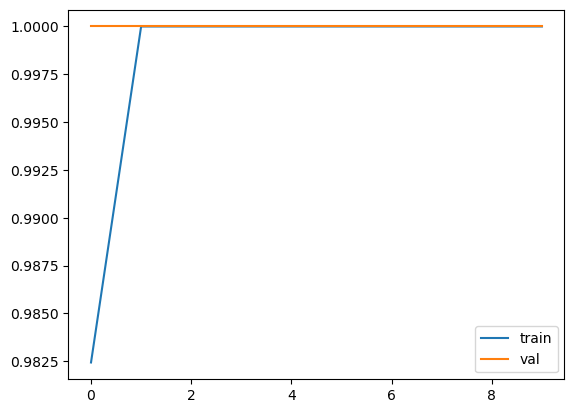

In [29]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

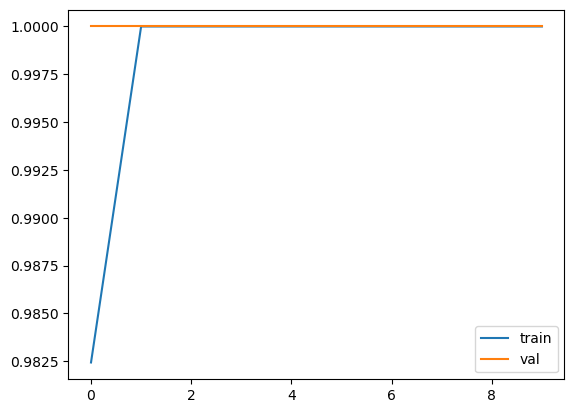

In [30]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()